In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
book=pd.read_csv("Books.csv")
book

C:\Users\ramya\AppData\Local\Temp\ipykernel_22608\653894793.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book=pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [17]:
book.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [18]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [19]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [20]:
book['Book-Title'] = book['Book-Title'].str.strip().str.lower()
book['Book-Author'] = book['Book-Author'].str.strip().str.lower()
book['Publisher'] = book['Publisher'].str.strip().str.lower()

In [21]:
duplicates = book.duplicated().sum()
print(f"\nDuplicate records found: {duplicates}")


Duplicate records found: 0


In [22]:
book = book.fillna({'Book-Author': 'Unknown', 'Publisher': 'Unknown'})

In [23]:
book['Year-Of-Publication'] = pd.to_numeric(book['Year-Of-Publication'], errors='coerce')

In [24]:
book.nunique()

ISBN                   271360
Book-Title             238960
Book-Author             99340
Year-Of-Publication       116
Publisher               16576
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [25]:
invalid_years = book[(book['Year-Of-Publication'] > 2025) | (book['Year-Of-Publication'] < 1000)]
print(f"\nInvalid years found:\n{invalid_years[['Book-Title', 'Year-Of-Publication']].head()}")


Invalid years found:
                                            Book-Title  Year-Of-Publication
176                                   kabale und liebe                  0.0
188                            die liebe in den zelten                  0.0
288                        poisonwood bible edition uk                  0.0
351       herr der fliegen (fiction, poetry and drama)                  0.0
542  biblioteca universale rizzoli: sulla sponda de...                  0.0


In [26]:
book.loc[(book['Year-Of-Publication'] > 2025) | (book['Year-Of-Publication'] < 1000), 'Year-Of-Publication'] = np.nan

In [27]:
median_year = book['Year-Of-Publication'].median()
book['Year-Of-Publication'] = book['Year-Of-Publication'].fillna(median_year)

In [28]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271360 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [29]:
ratings=pd.read_csv("Ratings.csv")
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [30]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [31]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [32]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [33]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [34]:
print("\nUnique Users:", ratings['User-ID'].nunique())
print("Unique Books (ISBNs):", ratings['ISBN'].nunique())
print("Rating value counts:\n", ratings['Book-Rating'].value_counts())



Unique Users: 105283
Unique Books (ISBNs): 340556
Rating value counts:
 Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64


In [35]:
print("\nMissing values:")
print(ratings.isnull().sum())


Missing values:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [36]:
duplicates = ratings.duplicated().sum()
print(f"\nDuplicate records found: {duplicates}")


Duplicate records found: 0


In [37]:
invalid_ratings = ratings[~ratings['Book-Rating'].between(0, 10)]
print(f"\nInvalid ratings found: {len(invalid_ratings)}")
if len(invalid_ratings) > 0:
    print(invalid_ratings.head())


Invalid ratings found: 0


In [38]:
ratings['Book-Rating'] = pd.to_numeric(ratings['Book-Rating'], errors='coerce')
ratings = ratings[(ratings['Book-Rating'] >= 0) & (ratings['Book-Rating'] <= 10)]  

In [39]:
Q1 = ratings['Book-Rating'].quantile(0.25)
Q3 = ratings['Book-Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [40]:
rating_outliers = ratings[(ratings['Book-Rating'] < lower_bound) | (ratings['Book-Rating'] > upper_bound)]
print("Outliers in Book-Rating based on IQR:")
print(rating_outliers)

Outliers in Book-Rating based on IQR:
Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []


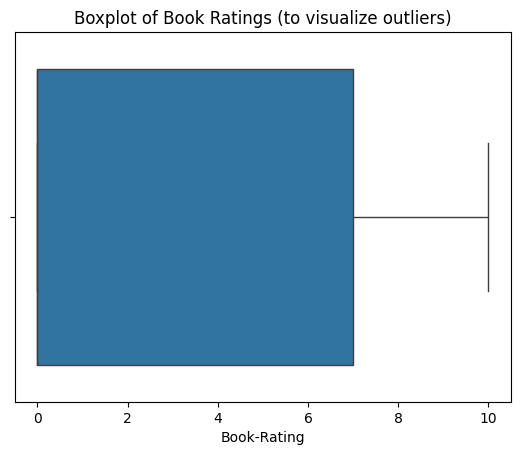

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=ratings['Book-Rating'])
plt.title("Boxplot of Book Ratings (to visualize outliers)")
plt.show()

In [42]:
users=pd.read_csv("Users.csv")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [43]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [44]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [45]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [46]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [47]:
duplicates = users.duplicated(subset=['User-ID']).sum()
print(f"\nDuplicate User-IDs: {duplicates}")


Duplicate User-IDs: 0


In [48]:
print("\nAge statistics:")
print(users['Age'].describe())



Age statistics:
count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64


In [49]:
invalid_ages = users[(users['Age'] < 5) | (users['Age'] > 100)]
print(f"\nUsers with invalid ages: {len(invalid_ages)}")



Users with invalid ages: 1248


In [50]:
users.loc[(users['Age'] < 5) | (users['Age'] > 100), 'Age'] = np.nan


In [51]:
median_age = users['Age'].median()
users['Age'] = users['Age'].fillna(median_age)


In [52]:

def detect_and_handle_outliers(df, column_name, handle=True):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower) | (df[column_name] > upper)]
    print(f"\nOutliers in '{column_name}': {len(outliers)}")

    if handle:
        median = df[column_name].median()
        df.loc[(df[column_name] < lower) | (df[column_name] > upper), column_name] = median
        print(f"Outliers in '{column_name}' replaced with median: {median}")

    return df

book = detect_and_handle_outliers(book, 'Year-Of-Publication')
users = detect_and_handle_outliers(users, 'Age')
ratings = detect_and_handle_outliers(ratings, 'Book-Rating')



Outliers in 'Year-Of-Publication': 4465
Outliers in 'Year-Of-Publication' replaced with median: 1996.0

Outliers in 'Age': 59040
Outliers in 'Age' replaced with median: 32.0

Outliers in 'Book-Rating': 0
Outliers in 'Book-Rating' replaced with median: 0.0


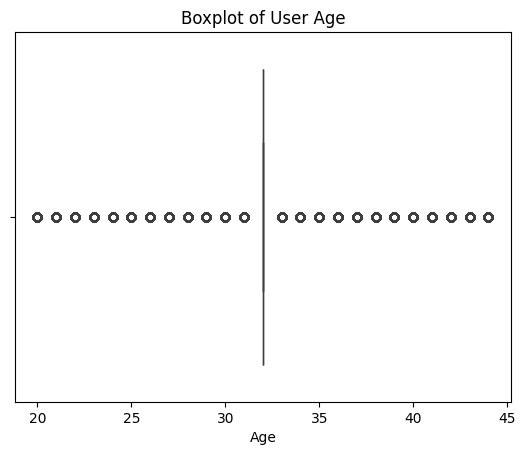

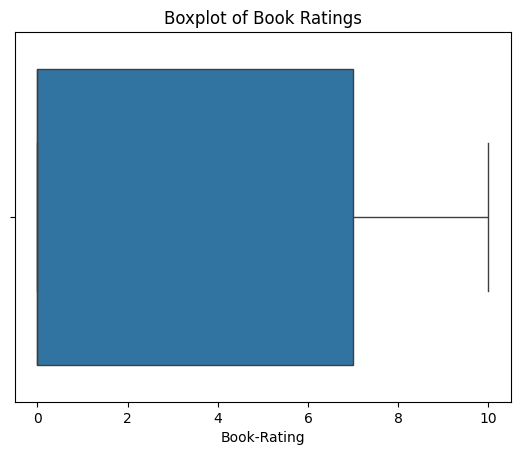

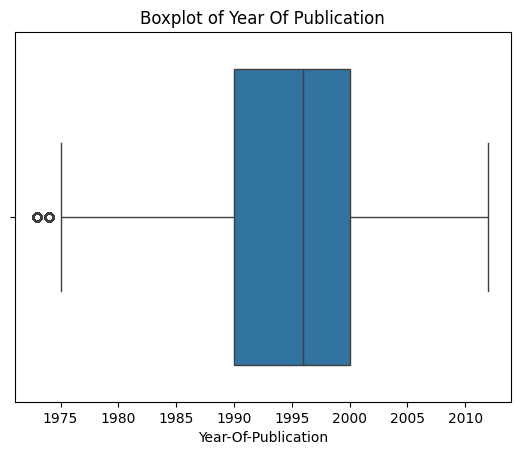

In [53]:
sns.boxplot(x=users['Age'])
plt.title("Boxplot of User Age")
plt.show()
sns.boxplot(x=ratings['Book-Rating'])
plt.title("Boxplot of Book Ratings")
plt.show()
sns.boxplot(x=book['Year-Of-Publication'])
plt.title("Boxplot of Year Of Publication")
plt.show()

In [54]:
book.to_csv('books_cleaned.csv', index=False)

In [55]:
ratings.to_csv('ratings_cleaned.csv', index=False)

In [56]:
users.to_csv('users_cleaned.csv', index=False)